In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


ca = pd.read_csv('ACA.PA.csv', index_col='Date', usecols=['Date','Close'])
ca.head()

,Close
Date,
2002-01-01,16.157314
2002-02-01,16.461349
2002-03-01,18.659092
2002-04-01,20.379063
2002-05-01,21.282482


# Analyse de la chronique

AttributeError: 'Line2D' object has no property 'method'

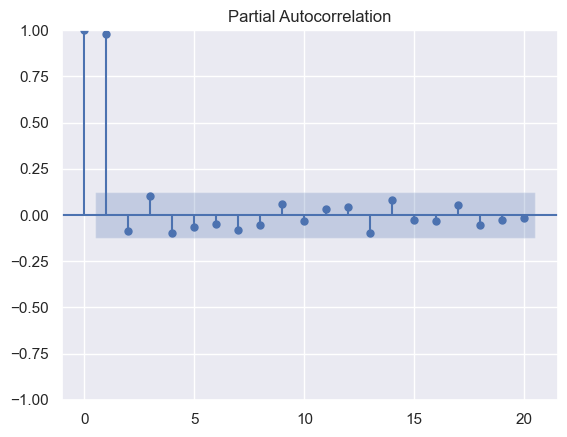

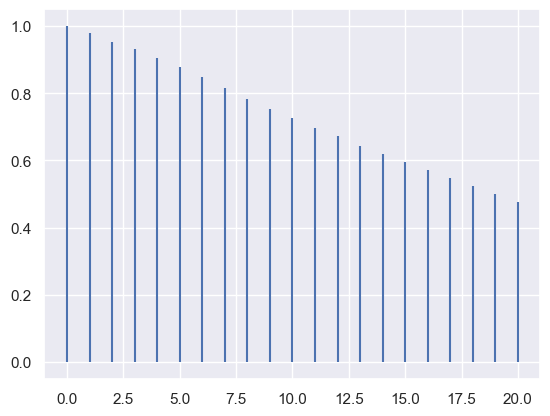

In [116]:
plot_pacf(ca['Close'], lags = 20, method = "ols")
plot_acf(ca['Close'], lags = 20, method = "ols")

<AxesSubplot:xlabel='Date'>

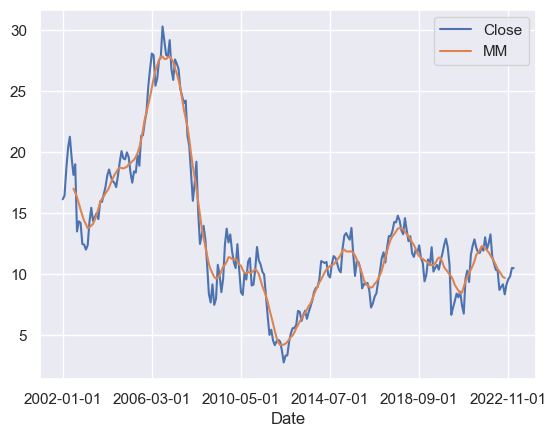

In [ ]:
ca.plot()

In [ ]:
ca['MM'] = ca.rolling(window = 12, center=True).mean()
display(ca)

,Close,MM
Date,,
2002-01-01,16.157314,NaN
2002-02-01,16.461349,NaN
2002-03-01,18.659092,NaN
2002-04-01,20.379063,NaN
2002-05-01,21.282482,NaN
...,...,...
2022-10-01,9.186000,NaN
2022-11-01,9.610000,NaN
2022-12-01,9.831000,NaN


<AxesSubplot:xlabel='Date'>

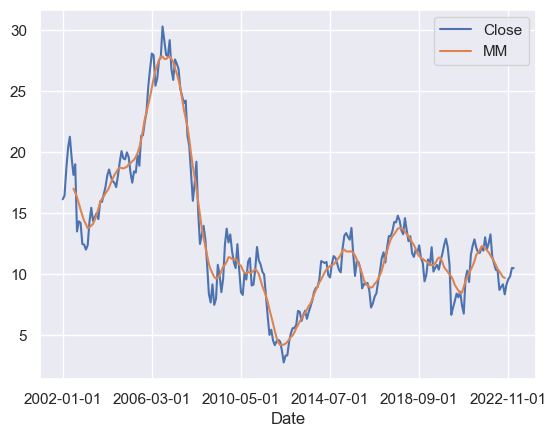

In [ ]:
ca.plot()